In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib

In [4]:
camera_port = 0
ramp_frames = 30 # Number of frames to throw away while the camera adjusts to light levels
camera = cv2.VideoCapture(camera_port)

def get_image():
    return_value, im = camera.read()
    return im

for i in xrange(ramp_frames):
    temp = get_image()
    
camera_capture = get_image()
cv2.imwrite("img.png", camera_capture)
del(camera)

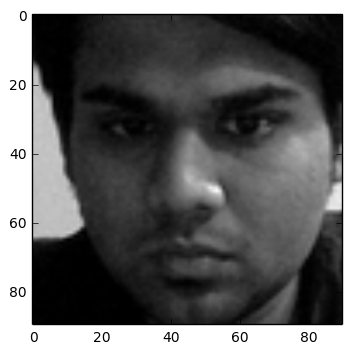

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
width = 90
height = 90
fname = 'User.1.6.png'
image = Image.open(fname).convert("L")
im5 = image.resize((width, height), Image.ANTIALIAS)
# plt.imshow(im5)
arr = np.asarray(im5)

plt.imshow(arr, cmap='gray')
plt.show()

In [48]:
# # img = mpimg.imread('User.1.6.png')
# fname = 'User.1.6.png'
# image = Image.open(fname).convert("L")
# # plt.imshow(image)
# arr = np.asarray(image)
# im5 = arr.resize((90, 90), Image.ANTIALIAS)
# plt.imshow(arr, cmap='gray')
# plt.show()

In [51]:
arr1 = arr.reshape(1, 8100)

In [52]:
arr1.size

8100

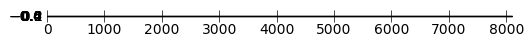

In [53]:
plt.imshow(arr1, cmap='gray')
plt.show()

In [56]:
arr2 = arr1.reshape(90, 90)

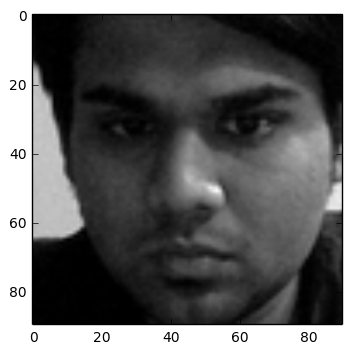

In [58]:
plt.imshow(arr2, cmap='gray')
plt.show()

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, svd_solver='randomized',
          whiten=True).fit(arr1)

In [71]:
eigenfaces = pca.components_.reshape((90, 90))

In [77]:
# plt.imshow(eigenfaces, cmap='gray')
# plt.show()
# eigenfaces

sklearn.decomposition.pca.PCA

In [80]:
X_train_pca = pca.transform(arr1)

In [530]:
# Data Preprocessing

path = 'Dataset'
imagePaths = [os.path.join(path, f) for f in os.listdir(path)]
print imagePaths
faces = []
IDs = []
data = []
for imagePath in imagePaths:
    if imagePath != 'Dataset/.DS_Store':
        faceImg = Image.open(imagePath).convert('L')
        faceNp = np.array(faceImg, 'uint8')
        faceNp = cv2.resize(faceNp, (40, 40))
        dataNp = faceNp.reshape((1600,))
        ID = int(os.path.split(imagePath)[-1].split('.')[1])
        faces.append(faceNp)
        IDs.append(ID)
        data.append(dataNp)
final_images = np.asarray(faces)
final_data = np.asarray(data)
n_features = final_data.shape[1]
y = np.asarray(IDs)
n_classes = 3
np.save('final_data', final_data)
np.save('final_labels', y)

['Dataset/.DS_Store', 'Dataset/User.1.1.png', 'Dataset/User.1.10.png', 'Dataset/User.1.11.png', 'Dataset/User.1.12.png', 'Dataset/User.1.13.png', 'Dataset/User.1.14.png', 'Dataset/User.1.15.png', 'Dataset/User.1.16.png', 'Dataset/User.1.17.png', 'Dataset/User.1.18.png', 'Dataset/User.1.19.png', 'Dataset/User.1.2.png', 'Dataset/User.1.20.png', 'Dataset/User.1.3.png', 'Dataset/User.1.4.png', 'Dataset/User.1.5.png', 'Dataset/User.1.6.png', 'Dataset/User.1.7.png', 'Dataset/User.1.8.png', 'Dataset/User.1.9.png', 'Dataset/User.2.1.png', 'Dataset/User.2.10.png', 'Dataset/User.2.11.png', 'Dataset/User.2.12.png', 'Dataset/User.2.13.png', 'Dataset/User.2.14.png', 'Dataset/User.2.15.png', 'Dataset/User.2.16.png', 'Dataset/User.2.17.png', 'Dataset/User.2.18.png', 'Dataset/User.2.19.png', 'Dataset/User.2.2.png', 'Dataset/User.2.20.png', 'Dataset/User.2.3.png', 'Dataset/User.2.4.png', 'Dataset/User.2.5.png', 'Dataset/User.2.6.png', 'Dataset/User.2.7.png', 'Dataset/User.2.8.png', 'Dataset/User.2.9.pn

In [6]:
# PCA training

n_components = 80
final_data = np.load('final_data.npy')
y = np.load('final_labels.npy')
print final_data.shape

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(final_data)

n_features = final_data.shape[1]

eigenfaces = pca.components_.reshape((n_components, 40, 40))

X_train_pca = pca.transform(final_data)


print X_train_pca.shape

from sklearn.externals import joblib
s = joblib.dump(pca, 'pca_trained_clf.pkl')
Xs = joblib.dump(X_train_pca, 'X_train_pca.pkl')


(118, 1600)
(118, 80)


In [7]:
# pca = PCA(n_components=n_components, svd_solver='randomized',
#           whiten=True).fit(final_data)
sum(pca.explained_variance_ratio_)

0.99485031026507709

In [201]:
# n_features = final_data.shape[1]

In [476]:
# eigenfaces = pca.components_.reshape((n_components, 40, 40))
pca.components_.shape

(40, 1600)

In [519]:
# test data

# X_train_pca = pca.transform(final_data)
pca_ = joblib.load('pca_trained_clf.pkl')
faceImg = Image.open('4.png').convert('L')
try:
    faceImg = cv2.cvtColor(faceImg, cv2.COLOR_BGR2GRAY)
except:
    pass
faceNp = np.array(faceImg, 'uint8')
faceNp = cv2.resize(faceNp, (40, 40))
X_test = faceNp.reshape((1,1600))
X_test_pca = pca_.transform(X_test)

In [520]:
# plt.imshow(X_train_pca[0], cmap='gray')
X_test_pca.shape


(1, 40)

In [499]:
# plt.imshow(eigenfaces[19], cmap='gray')
# faceImg = Image.open('User.1.6.png').convert('L')
# faceNp = np.array(faceImg, 'uint8')
# faceNp = cv2.resize(faceNp, (40, 40))
# dataNp = faceNp.reshape((1600,))
# pca.predict(dataNp)

In [523]:
# LDA training

X_train_pca = joblib.load('X_train_pca.pkl')
y = np.load('final_labels.npy')

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001).fit(X_train_pca, y)

# >>> print(clf.predict([[-0.8, -1]]))
X_train_lda = lda.transform(X_train_pca)
X_train_lda.shape
s = joblib.dump(lda, 'lda_trained_clf.pkl')
Xs = joblib.dump(X_train_lda, 'X_train_lda.pkl')
X_train_lda.shape

(60, 2)

In [501]:
# faceImg = Image.open('User.1.6.png').convert('L')
# faceNp = np.array(faceImg, 'uint8')
# faceNp = cv2.resize(faceNp, (40, 40))
# dataNp = faceNp.reshape((1600))
# pca = PCA(n_components=n_components, svd_solver='randomized',
#           whiten=True).fit(dataNp)
# X_test_pca = pca.transform(dataNp)
# lda.predict(X_test_pca)
# dataNp.shape

In [502]:
lda.predict(X_test_pca)

array([3])

In [503]:
X_train_lda = lda.transform(X_train_pca)

In [504]:
X_train_lda

array([[-24.55109909,  20.97184817],
       [-24.21859635,  19.37944845],
       [-24.60699173,  18.83456963],
       [-24.15975528,  19.01054769],
       [-24.52657352,  20.38602766],
       [-24.53614479,  19.30892424],
       [-24.04955405,  20.08314192],
       [-23.72259319,  18.29860799],
       [-25.32665134,  20.60973067],
       [-24.35937899,  19.2770067 ],
       [-25.22965272,  18.88180981],
       [-24.01775819,  19.47224794],
       [-25.1964971 ,  19.69526965],
       [-24.70189457,  18.19481985],
       [-24.38410509,  18.53067277],
       [-23.78806023,  20.19425741],
       [-25.35232504,  20.16760337],
       [-23.75762979,  19.24756658],
       [-24.40080473,  20.43499985],
       [-24.99165391,  19.88276559],
       [-27.14977804, -18.93452919],
       [-25.88735094, -19.40575859],
       [-26.42072168, -18.77893583],
       [-26.42072168, -18.77893583],
       [-26.56384513, -19.36025877],
       [-27.01716123, -19.70418556],
       [-26.16950696, -18.97742402],
 

In [505]:
X_test_lda = lda.transform(X_test_pca)

In [506]:
X_test_lda

array([[ 40.61592826,   7.62453165]])

In [507]:
lda.predict(X_test_pca)

array([3])

In [547]:
X_train_lda = joblib.load('X_train_lda.pkl')
y = np.load('final_labels.npy')
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(20), random_state=1).fit(X_train_lda, y)

s = joblib.dump(mlp, 'mlp_trained_clf.pkl')

In [509]:
mlp.predict(X_test_lda)

array([3])

In [510]:
mlp.classes_

array([1, 2, 3])

In [511]:
mlp.predict_proba(X_test_lda)

array([[  3.44981815e-11,   5.17223293e-09,   9.99999995e-01]])

In [493]:
mlp.n_layers_

3

In [494]:
mlp.n_outputs_

3

In [496]:
mlp.score(X_test_lda, np.array([3]))

1.0

In [527]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [550]:
camera_port = 0
ramp_frames = 30 # Number of frames to throw away while the camera adjusts to light levels
camera = cv2.VideoCapture(camera_port)

def get_image():
    return_value, im = camera.read()
    return im

for i in xrange(ramp_frames):
    temp = get_image()
    
camera_capture = get_image()
cv2.imwrite("img.png", camera_capture)
del(camera)

In [14]:
# plt.imshow(camera_capture, cmap='gray')
# plt.show()

In [552]:
faceDetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(camera_capture, cv2.COLOR_BGR2GRAY)
faces = faceDetect.detectMultiScale(gray, 1.3, 5)
sampleNumber = 0
for x, y, w, h in faces:
        sampleNumber += 1 
        cv2.imwrite("Detected/User."+str(sampleNumber) + ".png", gray[y:y+h, x:x+w])
#         cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [554]:
pca = joblib.load('pca_trained_clf.pkl')
lda = joblib.load('lda_trained_clf.pkl')
mlp = joblib.load('mlp_trained_clf.pkl')

path = 'Detected'
imagePaths = [os.path.join(path, f) for f in os.listdir(path)]

faces = []
IDs = []
data = []

for imagePath in imagePaths:
    if imagePath != 'Dataset/.DS_Store':
        faceImg = Image.open(imagePath).convert('L')
        try:
            faceImg = cv2.cvtColor(faceImg, cv2.COLOR_BGR2GRAY)
        except:
            pass
        faceNp = np.array(faceImg, 'uint8')
        faceNp = cv2.resize(faceNp, (40, 40))
        dataNp = faceNp.reshape((1600,))
#         ID = int(os.path.split(imagePath)[-1].split('.')[1])
        faces.append(faceNp)
#         IDs.append(ID)
        data.append(dataNp)
final_images = np.asarray(faces)
final_data = np.asarray(data)

# faceImg = Image.open('111.png').convert('L')



# faceNp = np.array(faceImg, 'uint8')
# faceNp = cv2.resize(faceNp, (40, 40))

# X_test = faceNp.reshape((1,1600))
# X_test_pca = pca.transform(X_test)
X_test_pca = pca.transform(final_data)
X_test_lda = lda.transform(X_test_pca)

print "LDA prediction: ", lda.predict(X_test_pca)
print "MLP prediction: ", mlp.predict(X_test_lda)

LDA prediction:  [3]
MLP prediction:  [3]


In [9]:
n_components = 80

final_data = np.load('final_data.npy')
y = np.load('final_labels.npy')
print final_data.shape

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(final_data)

n_features = final_data.shape[1]
eigenfaces = pca.components_.reshape((n_components, 40, 40))
X_train_pca = pca.transform(final_data)
# print X_train_pca.shape
print sum(pca.explained_variance_ratio_), pca.components_.shape

(118, 1600)
0.998496655167 (80, 1600)


In [10]:
s = joblib.dump(pca, 'pca_trained_clf.pkl')
Xs = joblib.dump(X_train_pca, 'X_train_pca.pkl')

In [12]:
X_train_pca = joblib.load('X_train_pca.pkl')
y = np.load('final_labels.npy')

lda = LinearDiscriminantAnalysis(priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001).fit(X_train_pca, y)

X_train_lda = lda.transform(X_train_pca)

In [13]:
s = joblib.dump(lda, 'lda_trained_clf.pkl')
Xs = joblib.dump(X_train_lda, 'X_train_lda.pkl')

In [15]:
X_train_lda

array([[ -4.09007206e+01,   2.84545227e+01,  -1.91352614e+01,
          2.86298745e+00,   1.67661582e+01],
       [ -4.08114974e+01,   2.88921717e+01,  -2.05491179e+01,
          2.19038999e+00,   1.68768716e+01],
       [ -4.07954558e+01,   2.87115563e+01,  -1.96747154e+01,
          2.85288920e+00,   1.67083678e+01],
       [ -4.10258625e+01,   2.79357630e+01,  -1.90974545e+01,
          3.18571248e+00,   1.67203287e+01],
       [ -4.14119655e+01,   2.80540082e+01,  -1.93998602e+01,
          2.03083122e+00,   1.71564720e+01],
       [ -4.13743208e+01,   2.79054616e+01,  -2.02319579e+01,
          1.67573966e+00,   1.53548113e+01],
       [ -4.05390499e+01,   2.84876212e+01,  -1.94350379e+01,
          2.53408132e+00,   1.77426215e+01],
       [ -4.08476751e+01,   2.88568881e+01,  -1.96542867e+01,
          2.85610685e+00,   1.65606200e+01],
       [ -4.07570248e+01,   2.86238837e+01,  -1.92206840e+01,
          2.71899905e+00,   1.63864064e+01],
       [ -4.09007206e+01,   2.8454522

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('img.png',0)
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf *hist.max()/ cdf.max() # this line not necessary.
 
# plt.plot(cdf_normalized, color = 'b')
# plt.hist(img.flatten(),256,[0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('cdf','histogram'), loc = 'upper left')
# plt.show()

In [21]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

In [12]:
img2

array([[ 45,  50,  53, ..., 241, 239, 234],
       [ 48,  49,  53, ..., 241, 239, 239],
       [ 48,  48,  54, ..., 243, 238, 236],
       ..., 
       [ 71,  72,  69, ..., 136, 131, 136],
       [ 69,  68,  68, ..., 131, 131, 131],
       [ 68,  68,  67, ..., 126, 131, 134]], dtype=uint8)

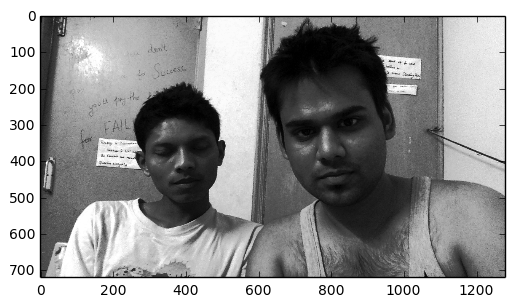

In [22]:
plt.imshow(img2, cmap='gray')
plt.show()

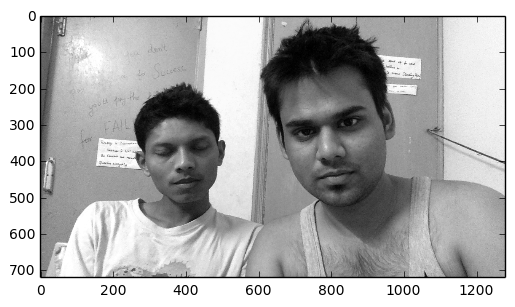

In [14]:
plt.imshow(img, cmap='gray')
plt.show()

In [19]:
img3 = cv2.imread('7.png', 0)
img4 = cv2.imread('9.png', 0)